In [5]:
# Importamos las librerias necesarias

import yfinance as yf

import pandas as pd

import bs4

In [6]:
# Importamos las librerias para el webscraping

import requests
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

#Buscamos la tabla en la pagina
table = soup.find("table", {"class": "wikitable"})
tbody = table.find("tbody")
rows = tbody.find_all("tr")

# Buscamos la columna que tenga de nombre GICS Sector
header_row = rows[0]
header_cols = header_row.find_all("th")
gics_sector_index = None
for i, col in enumerate(header_cols):
    if col.text.strip() == "GICS Sector":
        gics_sector_index = i
        break

# En caso de no encontrar la columna GICS Sector retorna un mensaje de error y termina el programa
if gics_sector_index is None:
    print("columna GICS Sector no encontrada")
    exit()

# Creamos una lista vacia para almacenar nuestros codigos de compañias
companies = []

# Buscamos y guardamos solo las compañias que sean del sector tecnologia de la información
for row in rows[1:]:
    cols = row.find_all("td")
    if len(cols) > gics_sector_index and cols[gics_sector_index].text.strip() == "Information Technology":
        company_name = cols[0].text.strip()
        companies.append(company_name)

In [7]:
# Visualizamos la lista de compañias

print(companies)

['ACN', 'ADBE', 'ADP', 'AKAM', 'AMD', 'APH', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ANET', 'ADSK', 'AVGO', 'BR', 'CDNS', 'CDW', 'CDAY', 'CSCO', 'CTSH', 'GLW', 'DXC', 'ENPH', 'EPAM', 'FFIV', 'FSLR', 'FIS', 'FISV', 'FLT', 'FTNT', 'IT', 'GEN', 'GPN', 'HPE', 'HPQ', 'IBM', 'INTC', 'INTU', 'JKHY', 'JNPR', 'KEYS', 'KLAC', 'LRCX', 'MA', 'MCHP', 'MU', 'MSFT', 'MPWR', 'MSI', 'NTAP', 'NVDA', 'NXPI', 'ON', 'ORCL', 'PAYX', 'PAYC', 'PYPL', 'PTC', 'QRVO', 'QCOM', 'ROP', 'CRM', 'STX', 'NOW', 'SWKS', 'SEDG', 'SNPS', 'TEL', 'TDY', 'TER', 'TXN', 'TRMB', 'TYL', 'VRSN', 'V', 'WDC', 'ZBRA']


In [12]:
# Descargamos los datos de las compañias de la lista

# Definimos el rango de fecha

start_date = '2000-01-01'
end_date = '2023-02-24'


#Utilizaremos solo Adj Close ya que corresponde al precio ajustado de cierre y tiene en cuenta
# los ajustes por dividendos y desdoblamiento de acciones.

data = yf.download(companies, start=start_date, end=end_date)['Adj Close']


[*********************100%***********************]  76 of 76 completed


In [13]:
# Visualizamos la informacion descargada

data

,AAPL,ACN,ADBE,ADI,ADP,ADSK,AKAM,AMAT,AMD,ANET,...,TDY,TEL,TER,TRMB,TXN,TYL,V,VRSN,WDC,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.850643,NaN,16.274672,29.116413,25.491156,8.052908,321.250000,23.479843,15.500000,NaN,...,9.375000,NaN,57.571915,4.145833,34.274361,5.875000,NaN,161.444855,3.161017,25.027779
2000-01-04,0.778925,NaN,14.909401,27.643438,25.491156,7.660817,300.000000,22.319765,14.625000,NaN,...,9.125000,NaN,55.825539,4.072917,32.816746,6.000000,NaN,159.958847,3.763115,24.666668
2000-01-05,0.790324,NaN,15.204177,28.047009,25.246056,7.178244,283.500000,21.484514,15.000000,NaN,...,9.500000,NaN,54.603069,3.817708,32.025490,6.187500,NaN,151.148895,3.512241,25.138889
2000-01-06,0.721931,NaN,15.328292,27.280247,25.583084,6.740916,236.125000,21.519325,16.000000,NaN,...,9.250000,NaN,51.925327,3.854167,31.150936,6.187500,NaN,131.724564,3.662766,23.777779
2000-01-07,0.756127,NaN,16.072985,28.047009,26.165215,7.540173,248.375000,21.704927,16.250000,NaN,...,9.562500,NaN,53.031345,3.854167,31.317526,5.937500,NaN,144.209732,4.515738,23.513889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-16,153.710007,281.220001,365.160004,193.830002,227.479996,222.130005,77.070000,115.120399,80.080002,141.679993,...,438.579987,132.000000,106.300003,54.970001,176.080002,339.089996,225.830002,207.419998,42.570000,333.440002
2023-02-17,152.550003,277.049988,356.850006,192.710007,228.699997,219.979996,77.300003,115.170280,78.500000,138.229996,...,438.950012,131.850006,105.250000,55.200001,175.320007,343.600006,223.559998,204.710007,41.580002,322.579987
2023-02-21,148.479996,269.149994,346.700012,185.970001,224.679993,215.550003,76.400002,111.019997,76.769997,134.529999,...,428.910004,126.680000,101.160004,53.119999,170.759995,333.260010,220.619995,203.869995,40.049999,307.000000


In [14]:
# Análisis exploratorio de datos
tech_returns = data.pct_change()
tech_returns.describe()

,AAPL,ACN,ADBE,ADI,ADP,ADSK,AKAM,AMAT,AMD,ANET,...,TDY,TEL,TER,TRMB,TXN,TYL,V,VRSN,WDC,ZBRA
count,5822.000000,5433.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,2194.000000,...,5822.000000,3951.000000,5822.000000,5822.000000,5822.000000,5822.000000,3759.000000,5822.000000,5822.000000,5822.000000
mean,0.001216,0.000770,0.000894,0.000657,0.000501,0.000918,0.000556,0.000657,0.001058,0.001424,...,0.000979,0.000591,0.000600,0.000869,0.000568,0.001102,0.000938,0.000555,0.001096,0.000717
std,0.025080,0.019010,0.027100,0.026117,0.015999,0.026388,0.040669,0.027885,0.039511,0.027427,...,0.025368,0.020376,0.031599,0.029509,0.024200,0.028647,0.018921,0.031952,0.036565,0.024060
min,-0.518692,-0.134543,-0.297579,-0.166149,-0.235792,-0.209486,-0.262784,-0.203576,-0.324022,-0.242344,...,-0.278846,-0.158262,-0.274047,-0.268085,-0.182243,-0.250000,-0.136435,-0.457785,-0.320755,-0.238459
25%,-0.010365,-0.007767,-0.010920,-0.011547,-0.006705,-0.011726,-0.013914,-0.013281,-0.018793,-0.011307,...,-0.009832,-0.008603,-0.015065,-0.012200,-0.010895,-0.010235,-0.007913,-0.010542,-0.015685,-0.010485
50%,0.000891,0.000857,0.000894,0.000491,0.000529,0.000917,0.000108,0.000451,0.000000,0.001738,...,0.000520,0.000611,0.000558,0.000000,0.000624,0.000487,0.001136,0.000514,0.000381,0.000299
75%,0.013154,0.009347,0.012417,0.011743,0.008113,0.013631,0.013742,0.014189,0.019915,0.014134,...,0.011156,0.010302,0.015248,0.012762,0.011661,0.011890,0.009375,0.011083,0.016669,0.011465
max,0.139050,0.163668,0.239719,0.179105,0.118273,0.168950,0.456954,0.256328,0.522901,0.218144,...,0.414966,0.145536,0.204824,0.295604,0.240678,0.347826,0.149973,0.304095,0.397590,0.228448


In [16]:
# Descartar empresas que no cumplen con ciertos criterios
tech_returns_mean = tech_returns.mean()
tech_returns_std = tech_returns.std()
low_returns = tech_returns_mean < 0.001  # Descartar empresas con rendimientos diarios promedio muy bajos
high_volatility = tech_returns_std > 0.03  # Descartar empresas con volatilidad diaria muy alta
tech_returns_filtered = tech_returns.loc[:, ~(low_returns | high_volatility)]

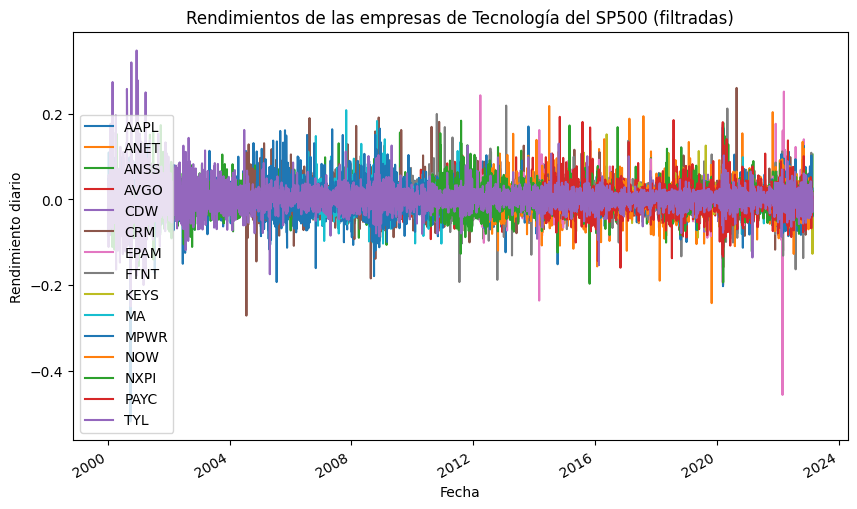

In [17]:
# Graficar los rendimientos de las empresas filtradas
import matplotlib.pyplot as plt

tech_returns_filtered.plot(figsize=(10,6))
plt.title('Rendimientos de las empresas de Tecnología del SP500 (filtradas)')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento diario')
plt.show()

In [19]:
# Guardamos los datos en un csv para su proxima utilización

tech_returns_filtered.to_csv('datasets/SP500_TechCompanies.csv')